## **T02: Data Complexity and Meta-Learning**
In this assignment, it is put in practice the basis of **data complexity** and **meta-learning**, with the use of the well-known [UCI ML Wine Data Set ](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) dataset, that is one of the datasets of the Scikit-learn datasets module, while exploring some popular open-source packages such as [problexity](https://problexity.readthedocs.io/en/latest/index.html), [pymfe](https://pymfe.readthedocs.io/en/latest/index.html), and [pyhard](https://ita-ml.gitlab.io/pyhard/index.html). 

It was imported warnings module to suppress any warnings that might appear during the execution of the code within the context manager. By filtering out these warnings, we improve the readability of the output, making it easier to focus on the main results without being distracted by non-critical warning messages."

In [44]:
import warnings
warnings.filterwarnings('ignore')


In [45]:
import pandas as pd
from sklearn.datasets import load_wine

In [46]:
df= load_wine(as_frame=True, return_X_y=True)
df= pd.concat(df, axis=1)

df.to_csv("wine_data.csv", index=False)

In [47]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [48]:
df.shape

(178, 14)

In [49]:
df["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [50]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [51]:
#import seaborn as sns

#sns.pairplot(df, diag_kind="hist", hue="target", markers=["o", "^", "s"], palette="deep")

The problexity library introduces the `ComplexityCalculator` to facilitate the computation and usage of the complexity measures. By default, the package will all 22 complexity measures ot the classification submodule:

In [52]:
import problexity as px

cc= px.ComplexityCalculator()

Executing the `fit()` method, which takes a set of features `X` and a set of labels `y` as an argument, will calculate the values of the measures:

In [53]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# Fit model with data
cc.fit(X,y)

The Clustering Coefficient Score (a measure calculated by the ComplexityCalculator) is an absolute measure of the degree of clustering structure within the dataset. In fact, this score measures how tightly data points form clusters in the feature space, with higher values typically indicating stronger clustering and, conversely, lower values suggesting less distinct clustering. In other words, the problexity module has an API call to retreive the value of this score, which is important on giving a notion of how clustered is the data at this point.

In [54]:
cc.score()

0.20960215266219875

The score obtained for this dataset, being aproximate to 0.21 is relatively low, which suggests that the data has a weak Clustering Struture, that is, the feature space does not group similar data points in a strong manner, so, the data feels pretty mixed at this point. Until this point, it is belivable to suggest that the classes of the dataset are currently overlapped , which can take a bad effect while being classified by distance-based models (such as K-Nearest Neighbours or Support Vector Machines). 

Executing the `fit()` method, which takes a set of features `X` and a set of labels `y` as an argument, will calculate the values of the measures. Followed by the dataset fitting , a complexity report is asked using the Complexity Calculator, in order to find the complexity measures and their respective standard Deviation. Followingly, each of these measures are converted to a Dataframe for a better visualization of the values.

In [55]:
x = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# Fit model with data
cc.fit(x,y)

report = cc.report()
cmplxty_measures = report["complexities"]
cmplxty_std = report["complexities_std"]

df_cmplxty_measures = pd.DataFrame(cmplxty_measures, index=[0])
df_cmplxty_std = pd.DataFrame(cmplxty_std, index=[0])

df_cmplxty_report = pd.concat([df_cmplxty_measures.T, df_cmplxty_std.T], axis=1)
df_cmplxty_report.columns = ['Complexity', 'Std']

df_cmplxty_report


,Complexity,Std
f1,0.147,0.074
f1v,0.027,0.013
f2,0.000,0.000
f3,0.153,0.110
f4,0.000,0.000
l1,0.006,0.008
l2,0.005,0.007
l3,0.000,0.000
n1,0.074,0.042
n2,0.345,0.098


To be easier to notice what measures have the most impact on the Clustering Coefficient score , with the help of matplotlib plots, it can be plotted a graph with respect to these newly-obtained measures.

<PolarAxes: >

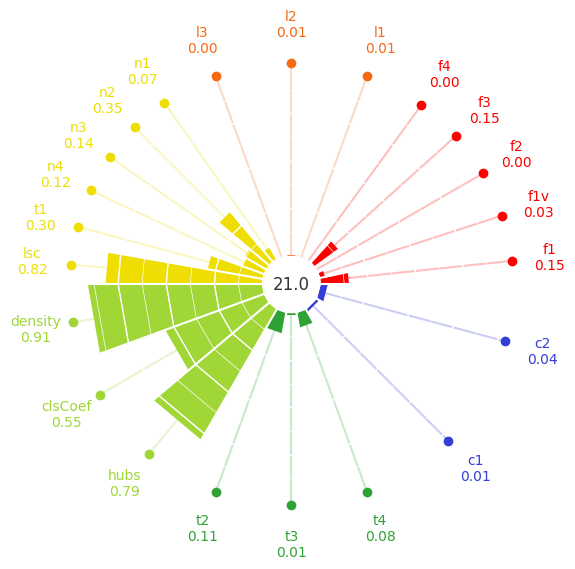

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
cc.plot(fig, (1,1,1))

The graphic is essencially a polar projection showcasing all measures, where each catergory of measures is grouped into colors:

<ul>
<li><span style="color: red">Red</span> - feature-based measures</li>
<li><span style="color: orange">Orange</span> - linearity measures</li>
<li><span style="color: yellow">Yellow</span> - neighbourhood measures</li>
<li><span style="color: green">Green</span> - network measures</li>
<li><span style="color: teal">Teal</span> - dimensionality measures</li>
<li><span style="color: blue">Blue</span> - class imbalance measures</li>
</ul>

Each family occupies the same area in the graphic, meaning that contexts that are less numerous in metrics (e.g., class imbalance) are not dominates in this presentation by categories described by many metrics (e.g., neighbourhood).


From the graph analysis , it can be inffered that the data is quite "densely" distributed. Better said, putting the dataset as a network , the average density of it is noticed to be quite high (0.91).
First of all it is important to notice that the Density metric evaluates how tightly packed data points are within the same class by creating an epsilon-Nearest Neighbors (ε-NN) graph. Points within a set distance (the epsilon is , by default 0.15 ), which is calculated by the Gower distance, are connected. Then, an filtered graph is obtained by only selecting the connected points that belong to the same graph. Finally, the density is obtained as a ratio between the number of edges of the filtered graph, and the graph itself. 
To conclude , as this dataset is presenting a high density , it suggests that there is a strong intra-class clustering, that is, samples within the same class share similar characteristics, being relatively close on the input space.

It can also be noticed a high LSC (Local Set Average Cardinality) Score  (0.82). In fact, this measure is dependent on the distances between instances and the distances to the instances’ nearest enemies – the nearest sample of the opposite class. The number of cases that lie closer to the sample than its closest "enemy" ( that is, a sample that belongs to a different class) is taken into account during calculation. That leads to conclude that, as LSC is high, there are many cases where a certain data point has close neighbours of the same class as his, as well as it has also close neighbours of "enemy" samples , that is, samples of different classes. It means that is highly probable that some classes are heavily overlapped, which can make it challenging for a classifier to separate classes effectively. Besides, if points from different classes themselves are commonly found within the same local neighborhoods, it can lead to higher misclassification rates, especially for models that rely on proximity (like KNN) or linear separability (like Logistic Regression).

To finish, it is worth noting the high hubness score of 0.79, indicating that, on average, a sample is highly connected or influential within its local neighborhood structure. However, in regions with significant class overlap, strong vertices are likely to be less connected to other strong neighbors, revealing higher hub scores. This aligns with the previously observed high density, as samples with high hubness scores can be influential, connecting to many neighbors who also have high connectivity. Such samples may indicate patterns or clusters within the data. Effectively, samples with high hubness scores can serve as anchors or core samples for their respective clusters, supporting the suspected intra-class clustering already pointed out and anomaly detection.

## **Exploring Additional Meta-Features with [pymfe](https://pymfe.readthedocs.io/en/latest/index.html)**

In [57]:
from pymfe.mfe import MFE
MFE.metafeature_description(sort_by_group=True, sort_by_mtf=True, include_references=True)

+-------------+-------------------+----------------------+---------------------+
|    Group    | Meta-feature name |     Description      |      Reference      |
+=============+===================+======================+=====================+
| clustering  | ch                | Compute the Calinski | [1] T. Calinski, J. |
|             |                   | and Harabasz index.  | Harabasz, A         |
|             |                   |                      | dendrite method for |
|             |                   |                      | cluster analysis,   |
|             |                   |                      | Commun. Stat.       |
|             |                   |                      | Theory Methods 3    |
|             |                   |                      | (1) (1974) 1–27.    |
|             |                   |                      |                     |
+-------------+-------------------+----------------------+---------------------+
| clustering  | int         

In [58]:
# Extract general measures
mfe = MFE(groups="general")
mfe.fit(X, y)
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

attr_to_inst                                                  0.07303370786516854
cat_to_num                                                                    0.0
freq_class.mean                                                0.3333333333333333
freq_class.sd                                                 0.06462709335856702
inst_to_attr                                                   13.692307692307692
nr_attr                                                                        13
nr_bin                                                                          0
nr_cat                                                                          0
nr_class                                                                        3
nr_inst                                                                       178
nr_num                                                                         13
num_to_cat                                                                    nan


After extracting the general measures, some of these were worth-noting to be looked more precisely. Given the attr_to_inst as an example, this ratio, approximately 0.027, represents the number of attributes relative to instances. In this particular case, this ratio also indicates that there are significantly more instances than attributes, suggesting that the dataset is more likely to provide robust patterns for learning without being overly complex in terms of dimensionality.

In [59]:
# Extract model-based measures
mfe = MFE(groups="statistical")
mfe.fit(X, y)
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

can_cor.mean                                                                  nan
can_cor.sd                                                                    nan
cor.mean                                                      0.30495748135034906
cor.sd                                                        0.19084648578991892
cov.mean                                                        40.57076594677672
cov.sd                                                          208.4038717518871
eigenvalues.mean                                                7645.500383967169
eigenvalues.sd                                                 27509.281976938077
g_mean.mean                                                     64.21452561911116
g_mean.sd                                                       188.5902292675184
gravity                                                        110.61064078790011
h_mean.mean                                                     59.77978348302762
h_mean.sd       

After looking at this extensive list of statistics, some of these statistical measues were also worth-noting to look at. Starting by looking at the eigenvalues mean (7645.5) and standard deviation (27509.2), it can be percevied that both of them are very high. That means that the principal components in the feature space carry significantly more variance than others, which supports a potencial benefit of Principal Component Analysis or another dimensionality reduction technique, which could help reduce noise by focusing on the most informative directions in the data. 
Moreover, the high variability in feature range, variance, and standard deviation suggests that normalization or standardization is essential for algorithms sensitive to scale. This is confirmed by var.mean (7645.5) and var.sd (27498.76), which indicate that some features have very high variability compared to others. This might suggest the need for feature scaling to improve model performance, especially for distance-based algorithms like k-NN or SVM.

## **Evaluating Instance Hardness with [pyhard](https://ita-ml.gitlab.io/pyhard/index.html)**

In [60]:
from pyhard.measures import ClassificationMeasures

In [61]:
m= ClassificationMeasures(df)
df_meta_features = m.calculate_all()
df_meta_features

,feature_kDN,feature_DS,feature_DCP,feature_TD_P,feature_TD_U,feature_CL,feature_CLD,feature_MV,feature_CB,feature_N1,feature_N2,feature_LSC,feature_LSR,feature_Harmfulness,feature_Usefulness,feature_F1,feature_F2,feature_F3,feature_F4
0,0.0,0.017544,0.000000,1.000000,0.6,0.035788,0.033731,0.169014,0.751404,0.0,0.240234,0.050847,0.126232,0.0,0.322034,0.653846,0.205737,0.469936,0.597781
1,0.0,0.017544,0.000000,1.000000,0.6,0.035791,0.033734,0.169014,0.751404,0.0,0.389466,0.661017,0.449771,0.0,0.372881,0.769231,0.279801,0.464193,0.554248
2,0.0,0.017544,0.000000,1.000000,0.6,0.035788,0.033731,0.169014,0.751404,0.0,0.351296,0.474576,0.292634,0.0,0.305085,0.769231,0.264819,0.497614,0.602740
3,0.0,0.017544,0.000000,1.000000,0.6,0.035788,0.033731,0.169014,0.751404,0.0,0.288569,0.152542,0.214934,0.0,0.559322,0.615385,0.180811,0.445486,0.625041
4,0.0,0.982456,0.968254,1.000000,1.0,0.042493,0.040434,0.169014,0.751404,0.0,0.407009,0.745763,0.501706,0.0,0.610169,0.846154,0.319136,0.523490,0.641622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.333333,0.025000,1.000000,0.8,0.055516,0.043270,0.323944,0.797753,0.0,0.307450,0.229167,0.333965,0.0,0.458333,0.653846,0.267590,0.458241,0.641350
174,0.0,0.333333,0.025000,1.000000,0.8,0.055516,0.043270,0.323944,0.797753,0.0,0.307730,0.354167,0.398468,0.0,0.312500,0.769231,0.231030,0.501610,0.666667
175,0.0,0.912281,0.250000,0.666667,0.6,0.055516,0.043270,0.323944,0.797753,0.0,0.246239,0.208333,0.261743,0.0,0.520833,0.653846,0.231030,0.443096,0.571749
176,0.0,0.912281,0.250000,0.666667,0.6,0.055516,0.043270,0.323944,0.797753,0.0,0.264591,0.208333,0.223224,0.0,0.416667,0.692308,0.242042,0.455275,0.600013


In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [64]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pc, columns=['z_1', 'z_2'])
pca_df["target"] = df.target
pca_df["kDN"] = df_meta_features["feature_kDN"]
pca_df

,z_1,z_2,target,kDN
0,-3.522934,1.453098,0,0.0
1,-2.528858,-0.330019,0,0.0
2,-2.785029,1.036936,0,0.0
3,-3.922588,2.768210,0,0.0
4,-1.407511,0.867773,0,0.0
...,...,...,...,...
173,3.627996,2.206617,2,0.0
174,2.942729,1.752263,2,0.0
175,3.027272,2.756040,2,0.0
176,2.755222,2.293784,2,0.0


In [66]:
pca_df["kDN"].value_counts()

0.0    134
0.1     18
0.2      8
0.3      7
0.4      7
0.5      1
0.9      1
0.7      1
0.6      1
Name: kDN, dtype: int64

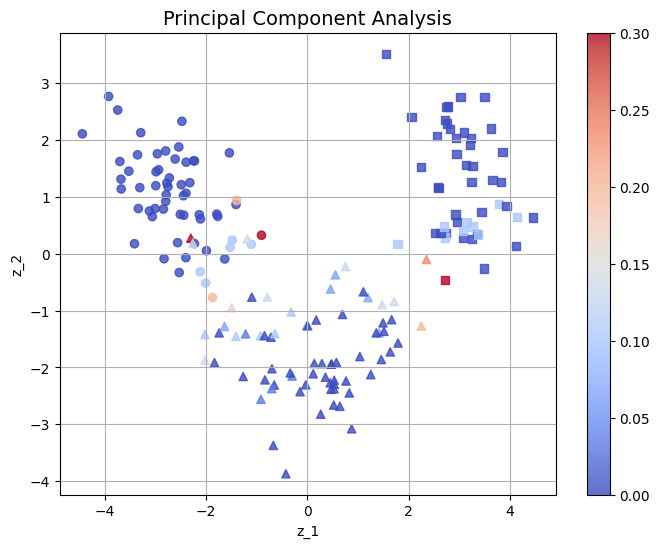

In [65]:
marker_map = {0: 'o', 1: '^', 2: 's'}
plt.figure(figsize=(8, 6))

for target in range(3):
    subset = pca_df[pca_df["target"] == target]
    scatter = plt.scatter(subset["z_1"], subset["z_2"], 
                label=target, 
                marker=marker_map[target],
                c=subset["kDN"],
                cmap='coolwarm',
                alpha=0.8)

plt.colorbar(scatter)

plt.title("Principal Component Analysis", fontsize=14)
plt.xlabel("z_1")
plt.ylabel("z_2")

plt.grid()
plt.show()